In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

import pickle, os

In [2]:
def plot_roc_curve(y, prob):
    fpr, tpr, _ = roc_curve(y, prob)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
    display.plot()

In [3]:
train = pd.read_csv('data/train_8_12.csv', index_col=[0])
X_train = train.drop(["win", "matchId"], axis=1)
y_train = train['win'].astype(int)

test = pd.read_csv('data/test_8_12.csv', index_col=[0])
X_test = test.drop(["win", "matchId"], axis=1)
y_test = test['win'].astype(int)

## Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
RETRAIN = True
rf_file = "models/rf_cv.pkl"

if os.path.exists(rf_file) and not RETRAIN:
    with open(rf_file, "rb") as f:
        grid = pickle.load(f)
    print("Succesfully loaded cached gridCV result.")
else:
    rf = RandomForestClassifier(random_state=42)
    param_grid = {"n_estimators": (10 ** np.linspace(0, 3, 100)).astype(int),
                "max_depth": [8, 9, 10]}
    grid = GridSearchCV(rf, param_grid, scoring="accuracy", n_jobs=-1, verbose=3, cv=10)
    grid.fit(X_train, y_train)

    with open(rf_file, "wb") as f:
        pickle.dump(grid, f)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
[CV 1/10] END ......max_depth=8, n_estimators=1;, score=0.585 total time=   0.1s
[CV 3/10] END ......max_depth=8, n_estimators=1;, score=0.604 total time=   0.0s
[CV 2/10] END ......max_depth=8, n_estimators=1;, score=0.604 total time=   0.0s
[CV 5/10] END ......max_depth=8, n_estimators=1;, score=0.547 total time=   0.0s
[CV 4/10] END ......max_depth=8, n_estimators=1;, score=0.717 total time=   0.0s
[CV 8/10] END ......max_depth=8, n_estimators=1;, score=0.596 total time=   0.0s
[CV 7/10] END ......max_depth=8, n_estimators=1;, score=0.660 total time=   0.0s
[CV 6/10] END ......max_depth=8, n_estimators=1;, score=0.585 total time=   0.1s
[CV 10/10] END .....max_depth=8, n_estimators=1;, score=0.712 total time=   0.0s[CV 9/10] END ......max_depth=8, n_estimators=1;, score=0.731 total time=   0.0s

[CV 2/10] END ......max_depth=8, n_estimators=1;, score=0.604 total time=   0.0s
[CV 1/10] END ......max_depth=8, n_estimator

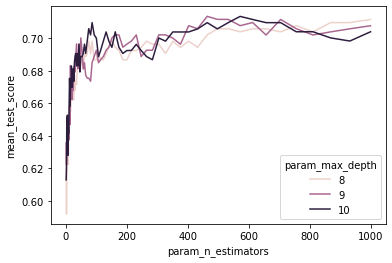

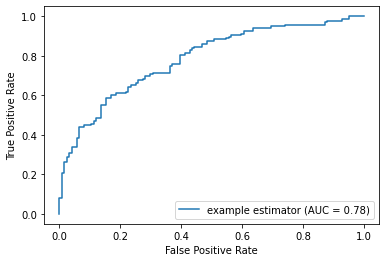

In [25]:
rf_cv_result = pd.DataFrame(grid.cv_results_)
final_rf = grid.best_estimator_

sns.lineplot(x="param_n_estimators", y="mean_test_score", hue="param_max_depth", data=rf_cv_result)
plot_roc_curve(y_test, final_rf.predict_proba(X_test)[:,1])

In [26]:
rf_cv_result.sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
188,4.030812,0.511351,0.167912,0.056475,9,464,"{'max_depth': 9, 'n_estimators': 464}",0.735849,0.773585,0.641509,0.698113,0.735849,0.716981,0.716981,0.653846,0.692308,0.769231,0.713425,0.041432,1
291,11.093851,3.516029,0.549858,0.239950,10,572,"{'max_depth': 10, 'n_estimators': 572}",0.716981,0.792453,0.622642,0.716981,0.735849,0.716981,0.735849,0.634615,0.711538,0.750000,0.713389,0.048045,2
189,3.562066,0.138109,0.164896,0.043637,9,497,"{'max_depth': 9, 'n_estimators': 497}",0.735849,0.773585,0.622642,0.679245,0.735849,0.716981,0.716981,0.634615,0.730769,0.769231,0.711575,0.048633,3
190,3.681622,0.266212,0.209755,0.041997,9,533,"{'max_depth': 9, 'n_estimators': 533}",0.735849,0.754717,0.622642,0.698113,0.735849,0.735849,0.716981,0.634615,0.730769,0.750000,0.711538,0.044177,4
99,6.345892,0.089152,0.310804,0.094150,8,1000,"{'max_depth': 8, 'n_estimators': 1000}",0.716981,0.754717,0.622642,0.716981,0.735849,0.735849,0.735849,0.653846,0.673077,0.769231,0.711502,0.044425,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0.034518,0.020779,0.007626,0.004751,8,2,"{'max_depth': 8, 'n_estimators': 2}",0.622642,0.528302,0.622642,0.716981,0.490566,0.509434,0.641509,0.615385,0.615385,0.557692,0.592054,0.065866,295
12,0.028164,0.019165,0.006339,0.001491,8,2,"{'max_depth': 8, 'n_estimators': 2}",0.622642,0.528302,0.622642,0.716981,0.490566,0.509434,0.641509,0.615385,0.615385,0.557692,0.592054,0.065866,295
13,0.030848,0.019767,0.006638,0.002091,8,2,"{'max_depth': 8, 'n_estimators': 2}",0.622642,0.528302,0.622642,0.716981,0.490566,0.509434,0.641509,0.615385,0.615385,0.557692,0.592054,0.065866,295
14,0.019562,0.002696,0.005922,0.001591,8,2,"{'max_depth': 8, 'n_estimators': 2}",0.622642,0.528302,0.622642,0.716981,0.490566,0.509434,0.641509,0.615385,0.615385,0.557692,0.592054,0.065866,295


## XGBoost Classifier

In [7]:
from xgboost import XGBClassifier

In [22]:
xgb = XGBClassifier(eval_metric="logloss", use_label_encoder=False, verbosity=0, silent=True, random_state=42)
param_grid = {"n_estimators": np.linspace(80, 400, 20).astype(int),
              "colsample_bytree": [0.4, 0.5],
              "max_depth": [6, 7, 8]}
grid = GridSearchCV(xgb, param_grid, scoring="accuracy", verbose=3, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 2/5] END colsample_bytree=0.4, max_depth=6, n_estimators=80;, score=0.651 total time=   0.6s
[CV 1/5] END colsample_bytree=0.4, max_depth=6, n_estimators=80;, score=0.726 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, max_depth=6, n_estimators=80;, score=0.629 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, max_depth=6, n_estimators=80;, score=0.705 total time=   0.6s
[CV 5/5] END colsample_bytree=0.4, max_depth=6, n_estimators=80;, score=0.705 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, max_depth=6, n_estimators=96;, score=0.714 total time=   0.7s
[CV 1/5] END colsample_bytree=0.4, max_depth=6, n_estimators=96;, score=0.698 total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, max_depth=6, n_estimators=96;, score=0.651 total time=   0.7s
[CV 4/5] END colsample_bytree=0.4, max_depth=6, n_estimators=96;, score=0.629 total time=   0.7s
[CV 5/5] END colsample_bytree=0.4, max_depth=6, n_estimators=96;

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     m...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5], 'max_depth': [6, 7, 8],
                         'n_estimators': array([ 80,  96, 113, 130, 147, 164, 181, 197, 214, 231, 248, 265, 282,
       298, 315, 332, 349, 366, 383, 400])},
             scoring='accuracy', verbose=3)

In [23]:
xgb_cv_result = pd.DataFrame(grid.cv_results_)
xgb_cv_result.sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,1.087396,0.052208,0.011978,0.003046,0.4,6,164,"{'colsample_bytree': 0.4, 'max_depth': 6, 'n_e...",0.707547,0.650943,0.714286,0.638095,0.714286,0.685031,0.033417,1
10,1.319086,0.046739,0.013395,0.002059,0.4,6,248,"{'colsample_bytree': 0.4, 'max_depth': 6, 'n_e...",0.707547,0.650943,0.714286,0.647619,0.704762,0.685031,0.029373,1
0,0.593619,0.028708,0.010494,0.000663,0.4,6,80,"{'colsample_bytree': 0.4, 'max_depth': 6, 'n_e...",0.726415,0.650943,0.704762,0.628571,0.704762,0.683091,0.036938,3
24,1.098436,0.122700,0.014936,0.007260,0.4,7,147,"{'colsample_bytree': 0.4, 'max_depth': 7, 'n_e...",0.754717,0.660377,0.704762,0.609524,0.685714,0.683019,0.048031,4
14,1.542449,0.046387,0.013509,0.001857,0.4,6,315,"{'colsample_bytree': 0.4, 'max_depth': 6, 'n_e...",0.679245,0.660377,0.714286,0.647619,0.704762,0.681258,0.025357,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2.648528,0.078086,0.015939,0.006683,0.5,7,383,"{'colsample_bytree': 0.5, 'max_depth': 7, 'n_e...",0.698113,0.622642,0.657143,0.638095,0.695238,0.662246,0.030175,116
97,2.242245,0.148048,0.015378,0.006579,0.5,7,366,"{'colsample_bytree': 0.5, 'max_depth': 7, 'n_e...",0.698113,0.622642,0.657143,0.638095,0.695238,0.662246,0.030175,116
96,2.041618,0.107600,0.013515,0.003796,0.5,7,349,"{'colsample_bytree': 0.5, 'max_depth': 7, 'n_e...",0.698113,0.622642,0.657143,0.638095,0.695238,0.662246,0.030175,116
119,2.642067,0.481539,0.008249,0.002485,0.5,8,400,"{'colsample_bytree': 0.5, 'max_depth': 8, 'n_e...",0.669811,0.669811,0.676190,0.657143,0.638095,0.662210,0.013551,119


## HyperOpt

In [35]:
import hyperopt
from hyperopt import hp
from hyperopt.pyll.base import scope
from hyperopt.pyll.stochastic import sample

In [48]:
def objectives(params):
    classifier_type = params['type']
    del params['type']
    if classifier_type == 'rf':
        clf = RandomForestClassifier(**params, random_state=42)
    elif classifier_type == 'xgb':
        clf = XGBClassifier(**params, eval_metric="logloss", use_label_encoder=False, random_state=42)
    accuracy = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1).mean()
    return {'loss': -accuracy, 'status': hyperopt.STATUS_OK}

space = hp.choice('clf_type', [
    {
        "type": "rf",
        "n_estimators": sample(scope.int(hp.quniform("n_estimators", 0, 800, 1))),
        "max_depth": sample(scope.int(hp.quniform("max_depth", 5, 15, 1)))
    },
    {
        "type": "xgb",
        "n_estimators": sample(scope.int(hp.quniform("n_estimators", 0, 800, 1))),
        "max_depth": sample(scope.int(hp.quniform("max_depth", 5, 15, 1)))
    }
])

trials = hyperopt.Trials()

best = hyperopt.fmin(objectives, 
                     space, 
                     algo=hyperopt.tpe.suggest, 
                     max_evals=20,
                     trials=trials)

100%|██████████| 20/20 [01:20<00:00,  4.03s/trial, best loss: -0.7135309973045822]


In [49]:
hyperopt.space_eval(space, best)

{'max_depth': 10, 'n_estimators': 682, 'type': 'rf'}